In [76]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
import glob

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_01//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_01//fitnesslog.txt.gz: unexpected end of file


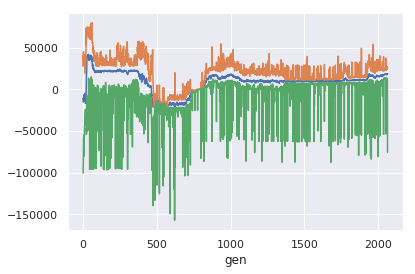

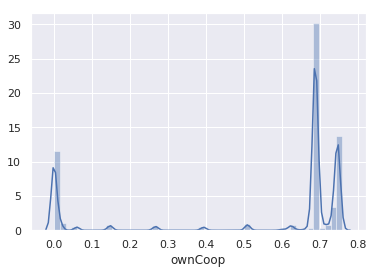

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_02//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_02//fitnesslog.txt.gz: unexpected end of file


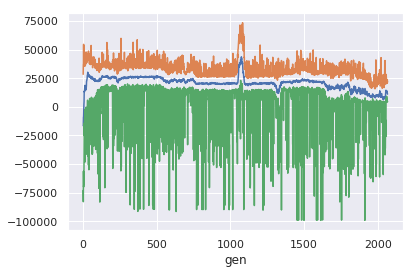

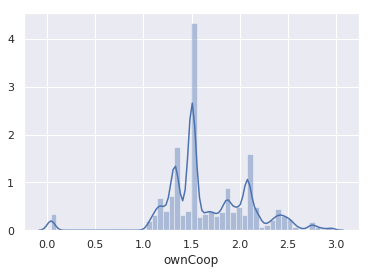

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_03//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_03//fitnesslog.txt.gz: unexpected end of file


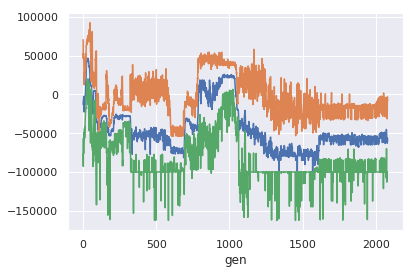

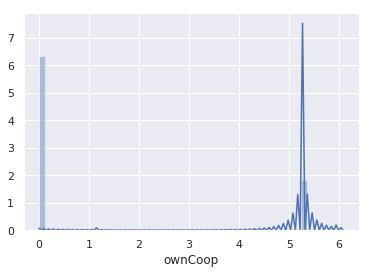

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_04//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_04//fitnesslog.txt.gz: unexpected end of file


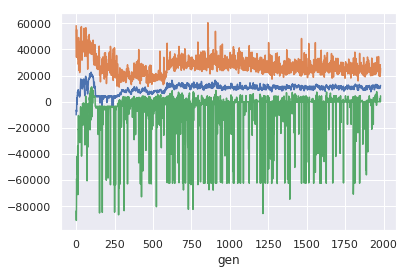

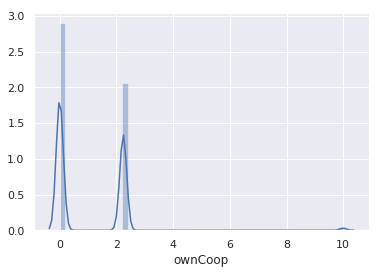

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_05//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_05//fitnesslog.txt.gz: unexpected end of file


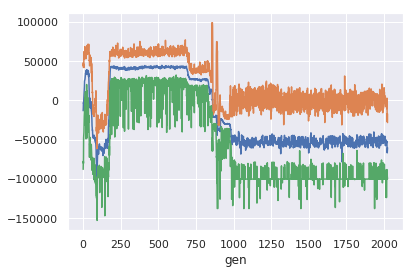

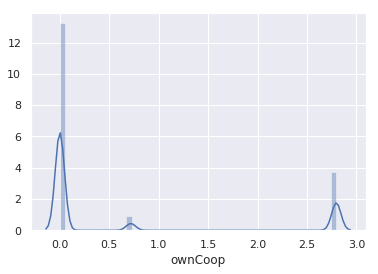

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_06//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_06//fitnesslog.txt.gz: unexpected end of file


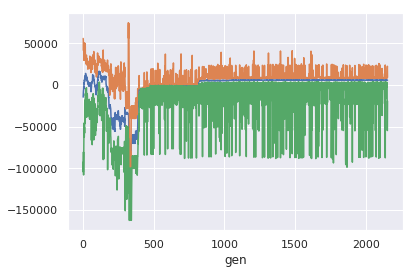

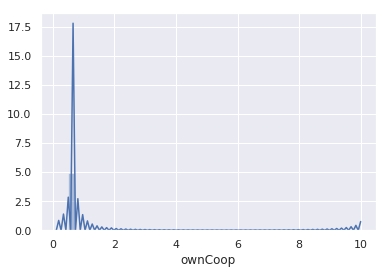

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_07//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_07//fitnesslog.txt.gz: unexpected end of file


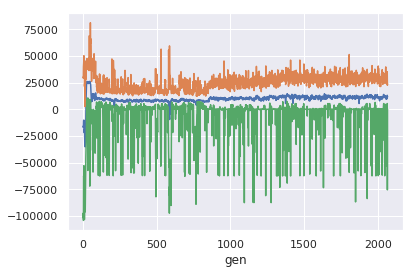

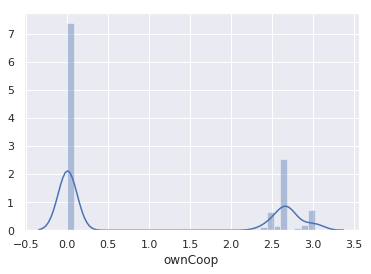

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_08//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_08//fitnesslog.txt.gz: unexpected end of file


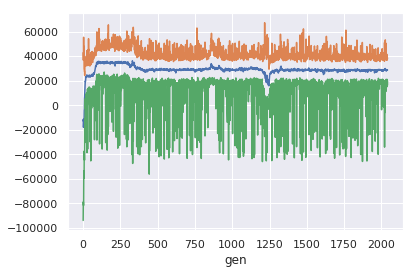

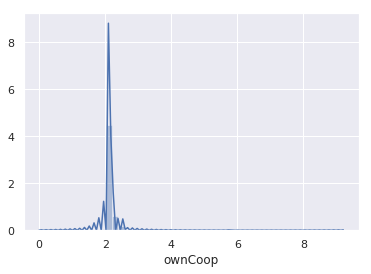

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_09//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_09//fitnesslog.txt.gz: unexpected end of file


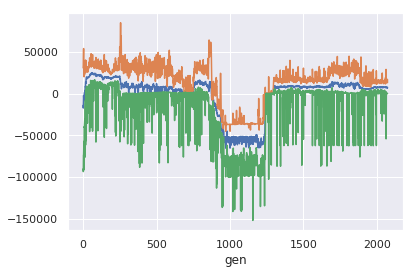

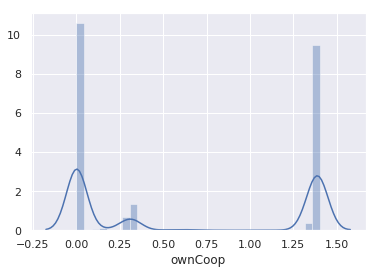

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_10//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_10//fitnesslog.txt.gz: unexpected end of file


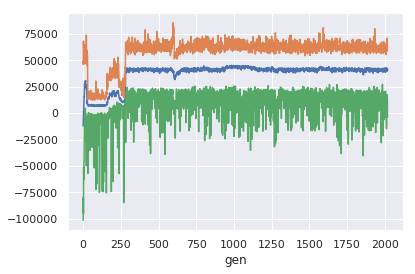

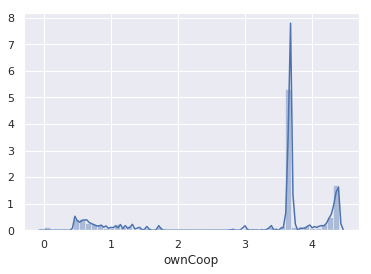

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_11//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_11//fitnesslog.txt.gz: unexpected end of file


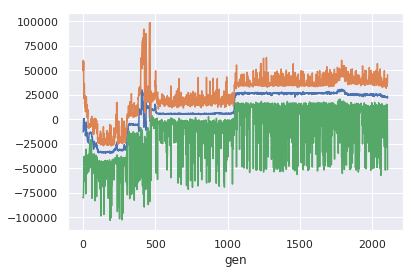

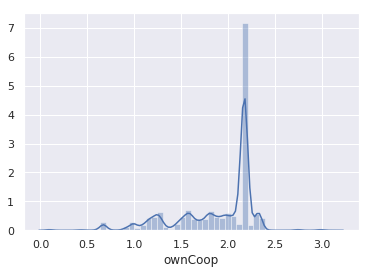

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_12//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_12//fitnesslog.txt.gz: unexpected end of file


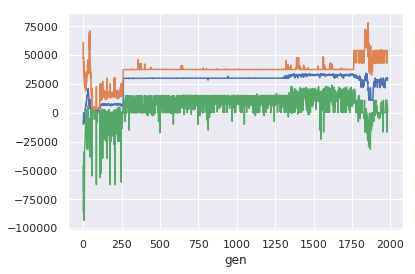

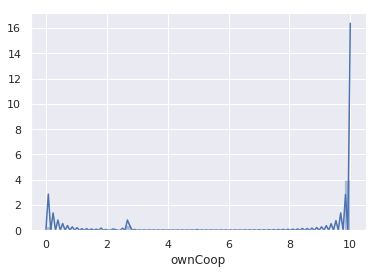

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_13//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_13//fitnesslog.txt.gz: unexpected end of file


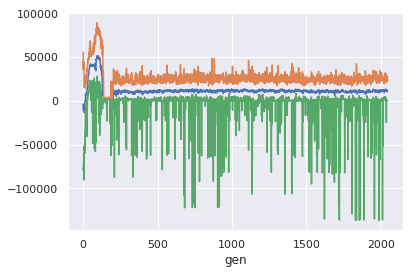

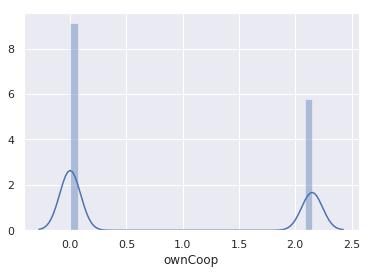

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_14//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_14//fitnesslog.txt.gz: unexpected end of file


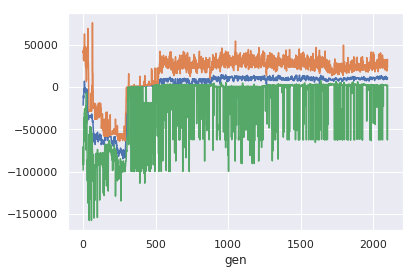

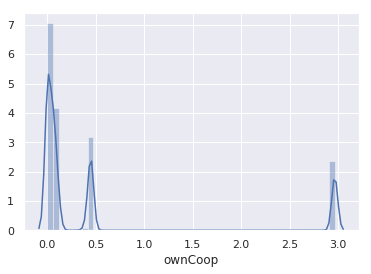

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_15//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_15//fitnesslog.txt.gz: unexpected end of file


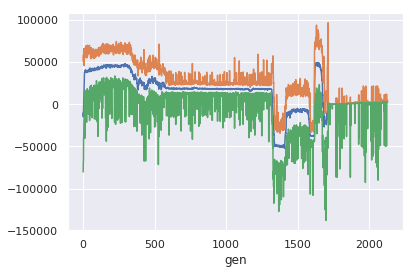

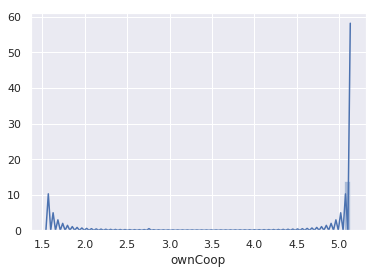

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_16//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_16//fitnesslog.txt.gz: unexpected end of file


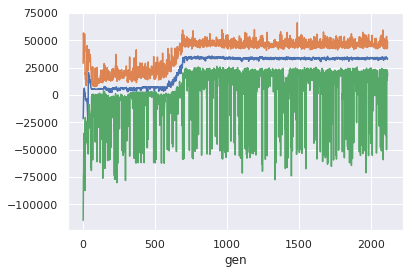

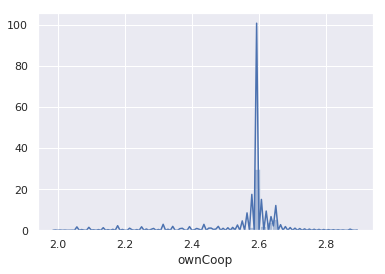

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_17//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_17//fitnesslog.txt.gz: unexpected end of file


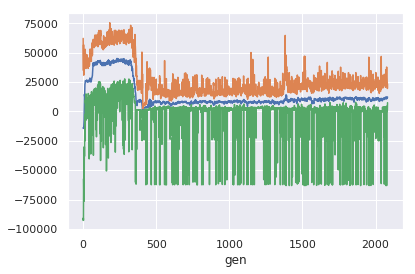

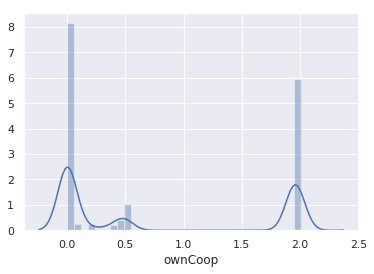

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_18//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_18//fitnesslog.txt.gz: unexpected end of file


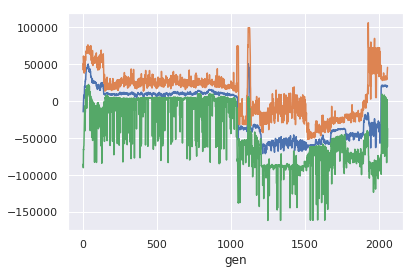

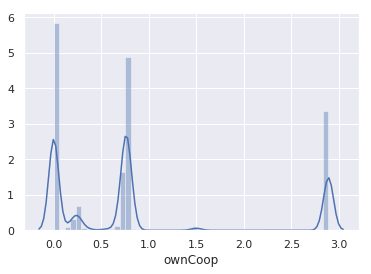

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_19//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_19//fitnesslog.txt.gz: unexpected end of file


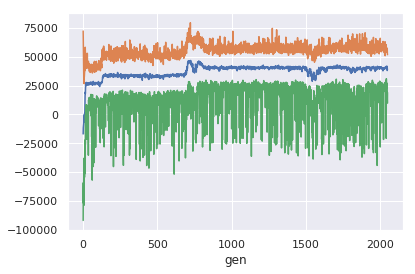

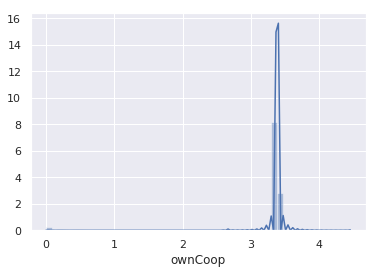

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_20//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_20//fitnesslog.txt.gz: unexpected end of file


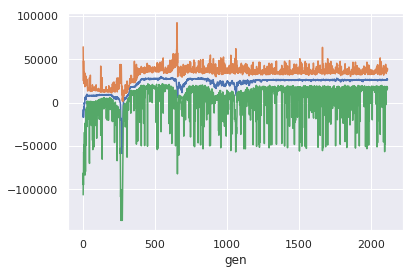

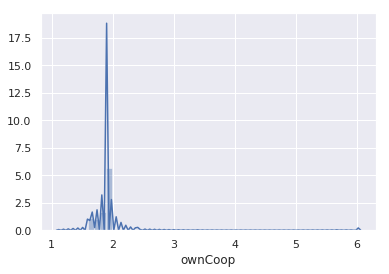

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_21//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_21//fitnesslog.txt.gz: unexpected end of file


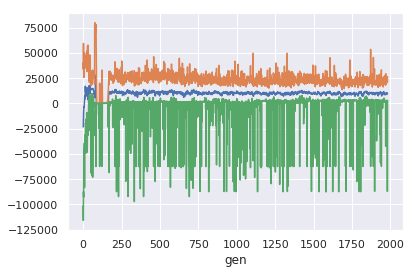

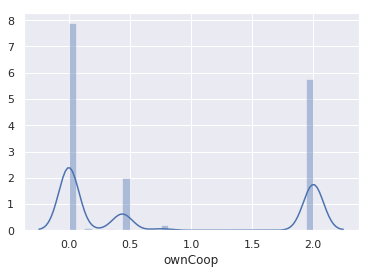

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_22//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_22//fitnesslog.txt.gz: unexpected end of file


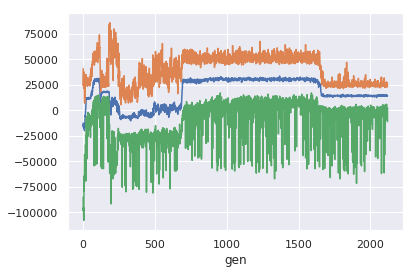

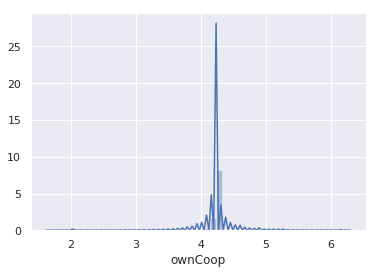

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_23//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_23//fitnesslog.txt.gz: unexpected end of file


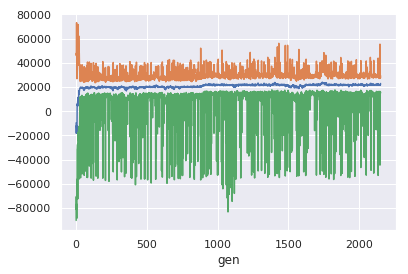

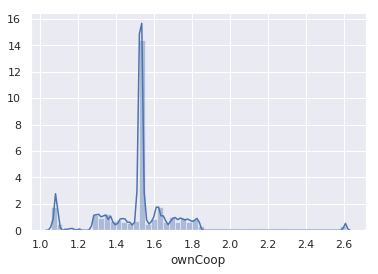

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_24//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_24//fitnesslog.txt.gz: unexpected end of file


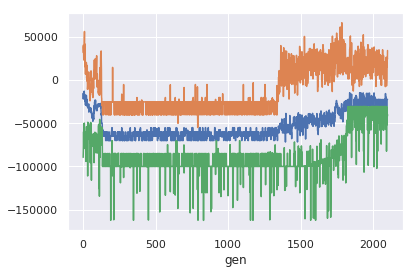

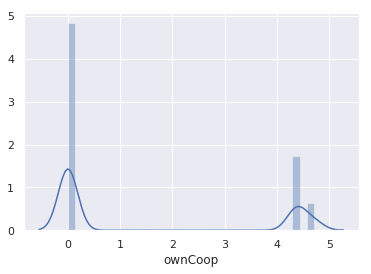

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_25//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_25//fitnesslog.txt.gz: unexpected end of file


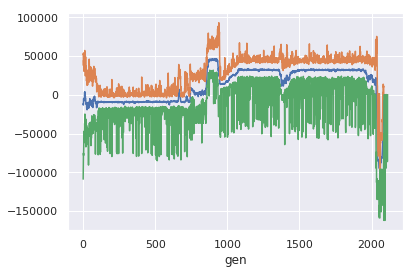

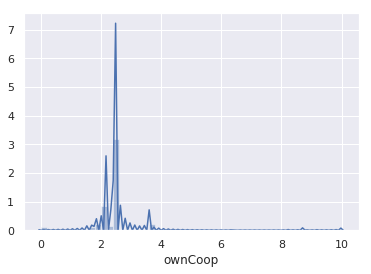

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_26//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_26//fitnesslog.txt.gz: unexpected end of file


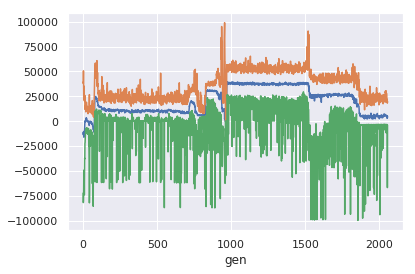

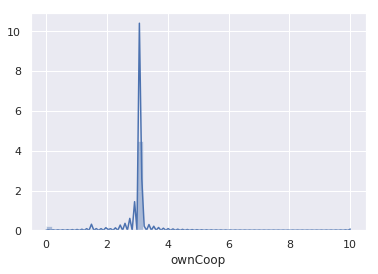

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_27//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_27//fitnesslog.txt.gz: unexpected end of file


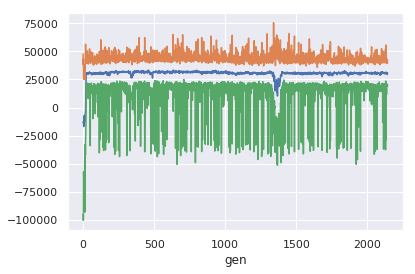

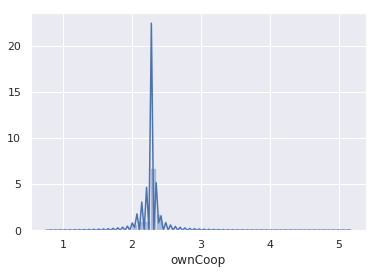

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_28//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_28//fitnesslog.txt.gz: unexpected end of file


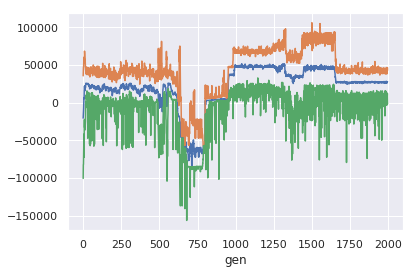

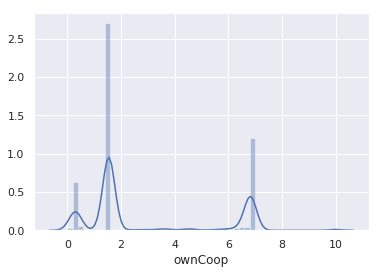

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_29//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_29//fitnesslog.txt.gz: unexpected end of file


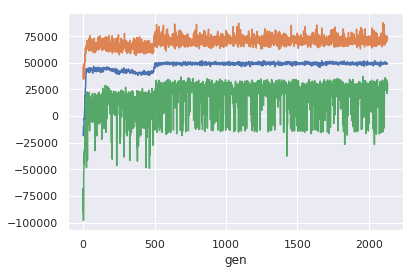

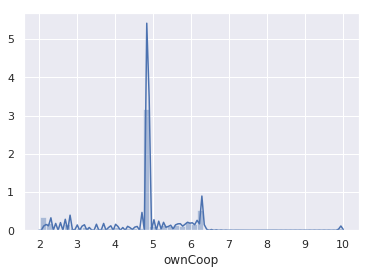

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_30//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_30//fitnesslog.txt.gz: unexpected end of file


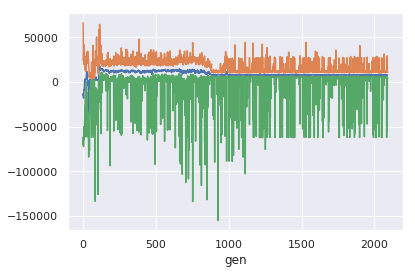

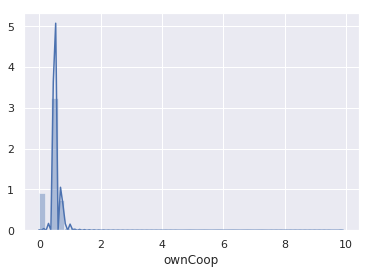

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_31//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_31//fitnesslog.txt.gz: unexpected end of file


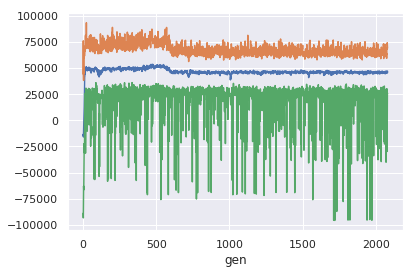

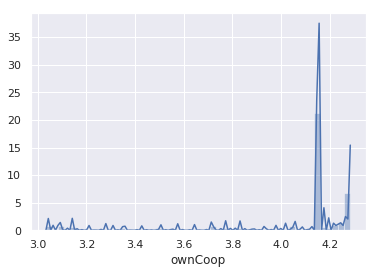

/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_32//fitnesslog.txt

gzip: /media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/run_32//fitnesslog.txt.gz: unexpected end of file


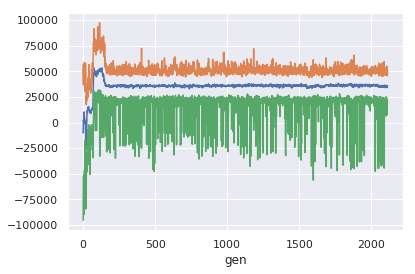

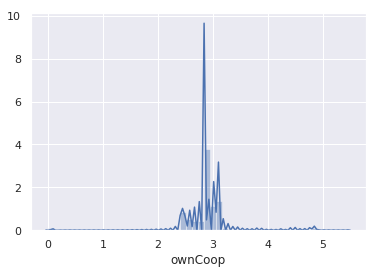

In [81]:
paths = '/media/paul/NotTooSlow/controlcontpunishdata/choice-2018-10-28-1037/*/'
for path in glob.iglob(paths):
    fitpath = path + '/fitnesslog.txt'
    print(fitpath)
    !zcat {fitpath+".gz"} > {fitpath}
    fit = pd.read_csv(fitpath)
    fit.groupby('gen')['fitness'].median().plot()
    fit.groupby('gen')['fitness'].max().plot()
    fit.groupby('gen')['fitness'].min().plot()
    plt.show()

    a = pd.read_csv(path+'/runlog_1500.txt.gz', skipinitialspace=True)
    sns.distplot(a.query(f'fake == False')['ownCoop'])
    plt.show()